In [1]:
import pandas as pd
import sqlite3 as sql
import numpy as np
import requests
import json
import matplotlib.pyplot as plt
import os
from functools import partial, reduce
from nba_api.stats.static import players
from nba_api.stats.endpoints import draftcombinestats
from nba_api.stats.endpoints import drafthistory
from nba_api.stats import endpoints
draft_df = pd.read_excel('Resources/NBA Drafts.xlsx')
mvp = pd.read_excel('new_folder/NBA_Finals_and_MVP.xlsx')

In [2]:
draftstats09 = draftcombinestats.DraftCombineStats(season_all_time=2009).get_dict()['resultSets'][0]['rowSet']
draftstats03 = draftcombinestats.DraftCombineStats(season_all_time = 2003).get_dict()['resultSets'][0]['rowSet']
draftstats07 = draftcombinestats.DraftCombineStats(season_all_time = 2007).get_dict()['resultSets'][0]['rowSet']
draftstats08 = draftcombinestats.DraftCombineStats(season_all_time = 2008).get_dict()['resultSets'][0]['rowSet']

In [3]:
draftstats00 = draftcombinestats.DraftCombineStats(season_all_time = 2000).get_dict()['resultSets'][0]['rowSet']
draftstats01 = draftcombinestats.DraftCombineStats(season_all_time = 2001).get_dict()['resultSets'][0]['rowSet']
draftstats02 = draftcombinestats.DraftCombineStats(season_all_time = 2002).get_dict()['resultSets'][0]['rowSet']

In [4]:
draftstats04 = draftcombinestats.DraftCombineStats(season_all_time = 2004).get_dict()['resultSets'][0]['rowSet']
draftstats05 = draftcombinestats.DraftCombineStats(season_all_time = 2005).get_dict()['resultSets'][0]['rowSet']
draftstats06 = draftcombinestats.DraftCombineStats(season_all_time = 2006).get_dict()['resultSets'][0]['rowSet']
draftstats10 = draftcombinestats.DraftCombineStats(season_all_time = 2010).get_dict()['resultSets'][0]['rowSet']

In [5]:
draftstats11= draftcombinestats.DraftCombineStats(season_all_time = 2011).get_dict()['resultSets'][0]['rowSet']
draftstats12= draftcombinestats.DraftCombineStats(season_all_time = 2012).get_dict()['resultSets'][0]['rowSet']
draftstats13 = draftcombinestats.DraftCombineStats(season_all_time = 2013).get_dict()['resultSets'][0]['rowSet']
draftstats14 = draftcombinestats.DraftCombineStats(season_all_time = 2014).get_dict()['resultSets'][0]['rowSet']

In [6]:
draftstats15 = draftcombinestats.DraftCombineStats(season_all_time = 2015).get_dict()['resultSets'][0]['rowSet']
draftstats16 = draftcombinestats.DraftCombineStats(season_all_time = 2016).get_dict()['resultSets'][0]['rowSet']
draftstats17 = draftcombinestats.DraftCombineStats(season_all_time = 2017).get_dict()['resultSets'][0]['rowSet']
draftstats18 = draftcombinestats.DraftCombineStats(season_all_time = 2018).get_dict()['resultSets'][0]['rowSet']

In [7]:
data_frames_list=[pd.DataFrame(draftstats00),
                   pd.DataFrame(draftstats01),
                   pd.DataFrame(draftstats02),
                   pd.DataFrame(draftstats03),
                   pd.DataFrame(draftstats04),
                   pd.DataFrame(draftstats05),
                   pd.DataFrame(draftstats06),
                   pd.DataFrame(draftstats07),
                   pd.DataFrame(draftstats08),
                   pd.DataFrame(draftstats10),
                   pd.DataFrame(draftstats11),
                   pd.DataFrame(draftstats12),
                   pd.DataFrame(draftstats13),
                   pd.DataFrame(draftstats14),
                   pd.DataFrame(draftstats15),
                   pd.DataFrame(draftstats16),
                   pd.DataFrame(draftstats17),
                   pd.DataFrame(draftstats18)
                  ]

In [8]:
headers = pd.DataFrame(draftcombinestats.DraftCombineStats(season_all_time=2009).get_dict()['resultSets'][0]['headers'])
james_harden = pd.DataFrame(draftstats09[23])
lebron = pd.DataFrame(draftstats03[37])
kd = pd.DataFrame(draftstats07[16])
rose = pd.DataFrame(draftstats08[65])
curry = pd.DataFrame(draftstats09[12])
westbrook = pd.DataFrame(draftstats08[74])

In [16]:
draft_data_frames1 = reduce(lambda  left,right: pd.merge(left,right,on=[0],
                                            how='outer'),data_frames_list)

In [77]:
draft_data_frames1.iloc[:,[6,10,13,15,19]].rename(columns={"6_x":'HEIGHT_WO_SHOES', '10_x':'WEIGHT','13_x':'STANDING_REACH','15_x':'BODY_FAT_PCT','19_x':'MAX_VERTICAL_LEAP'})

,HEIGHT_WO_SHOES,WEIGHT,STANDING_REACH,BODY_FAT_PCT,MAX_VERTICAL_LEAP
0,80.25,271,109.0,None,29.0
1,76.50,219,103.0,None,29.0
2,80.50,235.5,108.0,None,29.5
3,77.50,287,103.0,None,31.0
4,84.75,243,110.0,None,29.5
...,...,...,...,...,...
1222,NaN,NaN,NaN,NaN,NaN
1223,NaN,NaN,NaN,NaN,NaN
1224,NaN,NaN,NaN,NaN,NaN
1225,NaN,NaN,NaN,NaN,NaN


In [22]:
draft_stats = pd.DataFrame(headers).rename(columns={0:'Header'})
draft_stats['LeBron James'] = lebron
draft_stats['Derrick Rose'] = rose
draft_stats['Kevin Durant'] = kd
draft_stats['Steph Curry'] = curry
draft_stats['Rrussell Westbrook']=westbrook
draft_stats = draft_stats.iloc[[6,10,13,15,19],:].set_index('Header').T
draft_stats

Header,HEIGHT_WO_SHOES,WEIGHT,STANDING_REACH,BODY_FAT_PCT,MAX_VERTICAL_LEAP
LeBron James,79.25,245,106.25,6.7,None
Derrick Rose,73.5,196,98.5,4.6,40.0
Kevin Durant,81.0,215,110.0,6.6,33.5
Steph Curry,74.0,181,97.0,5.7,35.5
Rrussell Westbrook,74.25,192,100.0,4.8,36.5


In [51]:
players = ['Bob Pettit','Bob Cousy','Bill Russell','Wilt Chamberlain','Oscar Robertson','Wes Unseld','Willis Reed','Kareem Abdul-Jabbar','Dave Cowens','Bob McAdoo','Bill Walton','Moses Malone','Julius Erving','Larry Bird','Magic Johnson','Michael Jordan','Charles Barkley','Hakeem Olajuwon','David Robinson','Karl Malone',"Shaquille O'Neal",'Allen Iverson','Tim Duncan','Kevin Garnett','Steve Nash','Dirk Nowitzki','Kobe Bryant','LeBron James','Derrick Rose','Kevin Durant','Stephen Curry','Russell Westbrook','James Harden']
players = pd.DataFrame(players) 
players = players.rename(columns={ 0 : 'Player'})
draft_history = drafthistory.DraftHistory().get_dict()
all_drafts_headers = pd.DataFrame(draft_history['resultSets'][0]['headers'])
draft_history = pd.DataFrame(draft_history['resultSets'][0]['rowSet']).iloc[:,[1,2,3,4,11]].rename(columns={ 1 : 'Player', 2:'Year',3:'Round',4:'Pick',11:"College"})

In [52]:
mvp_draft=pd.merge(players, draft_history, on="Player", how="left")

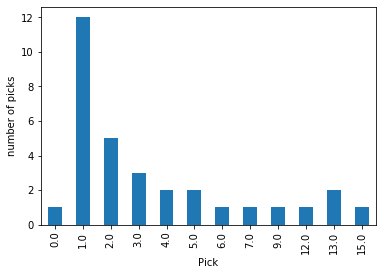

In [53]:
mvp_draft=mvp_draft.iloc[:,0:6]
mvp_draft_pick_chart=mvp_draft.groupby('Pick').count()['Player'].plot(kind='bar', ylabel= 'number of picks')

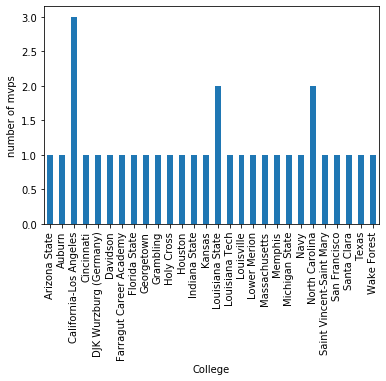

In [54]:
mvp_draft.groupby('College').count()['Player'].plot(kind='bar',ylabel= "number of mvps")

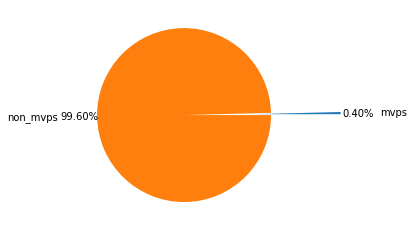

In [55]:
total_drafted = len(draft_history)
total_mvps = len(players)
non_mvps= total_drafted - total_mvps
labels = ['mvps','non_mvps']
explode = (0.8, 0.0,)
y = np.array([total_mvps,non_mvps])
plt.pie(y,labels = labels,autopct="%1.2f%%",pctdistance=1.2,labeldistance=1.45,explode = explode) 
plt.show()

In [71]:
total_drafted

8201

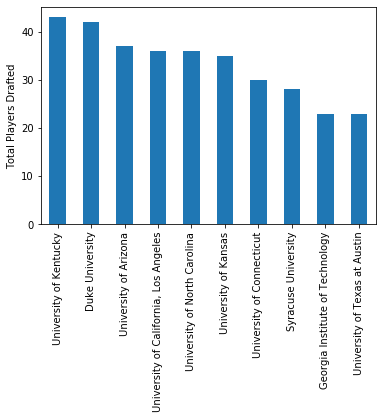

In [56]:
draft_df['College'].value_counts().head(10).plot(kind='bar',ylabel='Total Players Drafted')

In [57]:
mvp_postions = mvp['MVP Position']

In [58]:
mvp_postions = pd.DataFrame(mvp_postions)

In [59]:
mvp_postions_percentage = mvp_postions.value_counts()

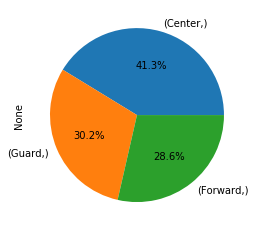

In [60]:
mvp_postions_percentage.plot(kind = "pie", autopct="%1.1f%%")

In [61]:
sixties = mvp.iloc[10:19]['MVP Position']
seventies = mvp.iloc[20:29]['MVP Position']
eighties = mvp.iloc[30:39]['MVP Position']
nineties = mvp.iloc[40:49]['MVP Position']
twok = mvp.iloc[50:59]['MVP Position']
tens = mvp.iloc[60:69]['MVP Position']

In [62]:
sixties = sixties.value_counts()
seventies = seventies.value_counts()
eighties = eighties.value_counts()
nineties = nineties.value_counts()
twok = twok.value_counts()
tens = tens.value_counts()

In [63]:
index = ['60s','70s','80s', '90s']
df = pd.DataFrame({'60': sixties,
                   '70s': seventies,
                   '80s': eighties,
                   '90s':nineties,
                   '00s':twok,
                   '10s':tens
                  })

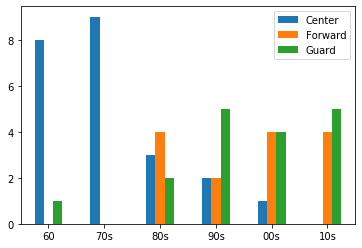

In [64]:
df = df.T
df.plot.bar(rot=0)

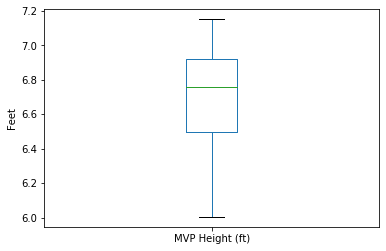

In [65]:
heightdf = pd.DataFrame(mvp['MVP Height (ft)'])
heightdf.plot.box(xlabel = " ", ylabel = "Feet")

In [66]:
quartiles = mvp['MVP Height (ft)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
midq = quartiles[0.5]
upperq = quartiles[0.75]
iqr = upperq-lowerq
quartiles

0.25    6.498032
0.50    6.758530
0.75    6.922572
Name: MVP Height (ft), dtype: float64

In [ ]:
# corr = pd.DataFrame(capo_weight_df.corr())
# corr = corr.loc['Tumor Volume (mm3)','Weight (g)']